In [1]:
import cv2

In [41]:
import requests
with open('kaptcha.jpg', 'wb') as f:
    res = requests.get('http://gcis.nat.gov.tw/pub/kaptcha.jpg')
    f.write(res.content)

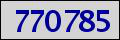

In [42]:
from PIL import Image
image = Image.open('kaptcha.jpg')
image

In [43]:
import PIL
import numpy
pil_image = PIL.Image.open('kaptcha.jpg').convert('RGB') 
open_cv_image = numpy.array(pil_image) 

In [45]:
#open_cv_image

Populating the interactive namespace from numpy and matplotlib


c:\programdata\anaconda3\envs\opencvtest\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


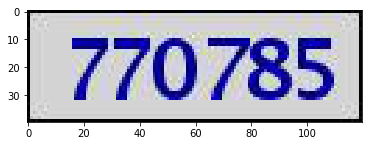

In [46]:
%pylab inline
from matplotlib import pyplot as plt
plt.imshow(open_cv_image)

In [47]:
imgray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [48]:
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])

In [50]:
ary = []
for (c,_) in cnts:
    (x,y,w,h) = cv2.boundingRect(c)
    print((x,y,w,h))
    if w >= 15 and h == 24:
        ary.append((x,y,w,h) )

(1, 1, 118, 38)
(15, 9, 15, 24)
(30, 9, 15, 24)
(44, 9, 18, 24)
(49, 13, 8, 16)
(64, 9, 17, 24)
(78, 9, 18, 24)
(83, 22, 8, 7)
(84, 13, 6, 5)
(96, 9, 15, 24)


In [51]:
print(ary)

[(15, 9, 15, 24), (30, 9, 15, 24), (44, 9, 18, 24), (64, 9, 17, 24), (78, 9, 18, 24), (96, 9, 15, 24)]


Populating the interactive namespace from numpy and matplotlib


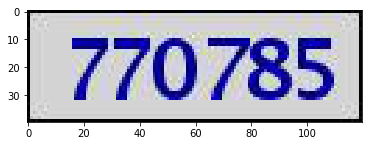

In [52]:
%pylab inline
plt.imshow(open_cv_image)

In [53]:
ary

[(15, 9, 15, 24),
 (30, 9, 15, 24),
 (44, 9, 18, 24),
 (64, 9, 17, 24),
 (78, 9, 18, 24),
 (96, 9, 15, 24)]

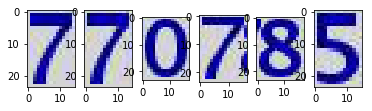

In [54]:
from matplotlib import pyplot as plt
fig = plt.figure()
for id, (x,y,w,h) in enumerate(ary):
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    a = fig.add_subplot(1, len(ary), id+1)
    plt.imshow(thresh)

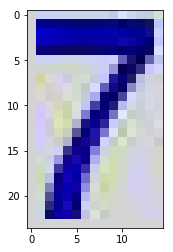

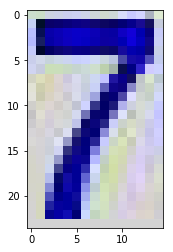

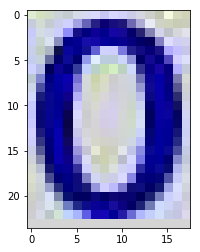

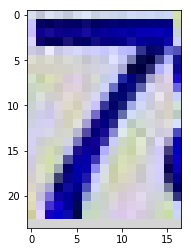

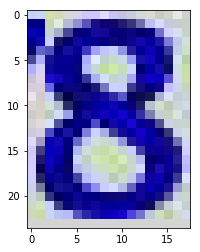

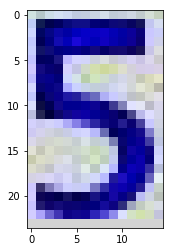

In [55]:
from matplotlib import pyplot as plt

for id, (x,y,w,h) in enumerate(ary):
    fig = plt.figure()
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    plt.imshow(thresh)
    plt.savefig('{}.jpg'.format(id+1), dpi=100)